Problem Statement:
    
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a
test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10
classes.

Each training and test example is assigned to one of the following labels: T-shirt/top, Trouser, Pullover,
Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

In the csv file of both train and test set
Each row is a separate image
Column 1 is the class label
Remaining columns are pixel numbers (784 total)
Each value is the darkness of the pixel (1 to 255)

Aim: To build a classification model using KNN algorithm to identify correct labels based on the images

Performing EDA

In [1]:
#importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data csv and converting it into a dataframe
df=pd.read_csv('fashion-mnist_train.csv')
# quick peek into the dataframe
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# checking the datatypes in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


The whole dataset contains only int64 datatype and there are no strings or objects. No need for any datatype
conversions

In [4]:
# checking for null-values
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

There are no nulls in this dataframe

In [5]:
# checking the number of duplicated images
df.duplicated().sum()

43

In [6]:
# dropping the above 43 duplicated images
df.drop_duplicates(inplace=True)
df.shape

(59957, 785)

Data Preprocessing & Making Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Creating X and y variables
X=df.drop('label',axis=1)
y=df.label

In [9]:
# instantiating normalizer object
normalize=MinMaxScaler()

By performing 5-fold cross validation, capture train and test error rate. 
Plot the elbow-graph to figure the optimal value K.

From the elbow graph i figured out that the test error rate is lowest when K=4. 

Let us now build our final model using this value of K and then obtain the confusion matrix and complete 
classification report for both the training set and the testing set.


In [10]:
# instantiating a knn object with K=4
knn=KNeighborsClassifier(n_neighbors=4)

In [11]:
# normalizing the predictors
X_norm=normalize.fit_transform(X)

In [12]:
# fitting the transformed data on the above KNeighborsClassifier object
knn.fit(X_norm,y)

KNeighborsClassifier(n_neighbors=4)

In [13]:
# making predictions off of the dataset using the above KNN model
y_pred=knn.predict(X_norm)
y_pred

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

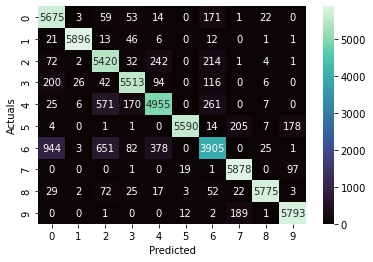

In [15]:
# creating confusion matrix for this training set
sns.heatmap(confusion_matrix(y,y_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

From the above heatmap, we can see that the label 6 which denotes Shirt suffers the highest number of
misclassifications followed by label 4 which denotes Coat.

Though there's a significant number of misclassifications, compared to the size of the dataset, it is quite small
and reasonable. Let us view the complete classification report to further understand the quality of the
prediction.

In [16]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      5998
           1       0.99      0.98      0.99      5996
           2       0.79      0.91      0.85      5988
           3       0.93      0.92      0.92      5997
           4       0.87      0.83      0.85      5995
           5       0.99      0.93      0.96      6000
           6       0.82      0.65      0.73      5989
           7       0.93      0.98      0.96      5996
           8       0.99      0.96      0.97      6000
           9       0.95      0.97      0.96      5998

    accuracy                           0.91     59957
   macro avg       0.91      0.91      0.91     59957
weighted avg       0.91      0.91      0.91     59957



All the important metrics such as precision, recall and f1-score are pretty high.

In [17]:
# computing the exact accuracy_score
train_accuracy=round(100*accuracy_score(y,y_pred),2)
print(f'The train accuracy score is {train_accuracy}%')

The train accuracy score is 90.73%


Here we are loading the unseen testing set to make inference using the above knn model.

In [18]:
#reading the data csv and converting it into a dataframe
df_test=pd.read_csv('fashion-mnist_test.csv')
#quick peek into the dataframe
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# checking the datatypes in this dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


The whole dataset contains only int64 datatype and there are no strings or objects. No need for any datatype
conversions.

In [20]:
# checking for null-values
df_test.isnull().sum().sum()

0

There are no nulls in this dataframe

In [21]:
# splitting the testing set into predictor and target variables
X_test=df_test.drop('label',axis=1)
y_test=df_test.label

In [22]:
X_test_norm=normalize.transform(X_test)

In [23]:
# making predictions off of the testing data using the same knn model
y_test_pred=knn.predict(X_test_norm)
y_test_pred

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

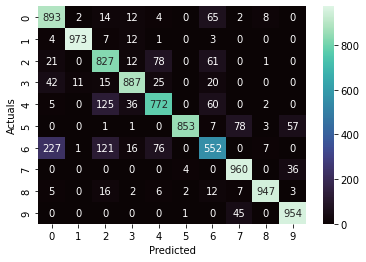

In [24]:
# creating confusion matrix for this testing set
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

Exactly like in the case of training set, we can see that the label 6 which denotes Shirt suffers the highest
number of misclassifications followed by label 4 which denotes Coat. 

Though there's a significant number of misclassifications, compared to the size of the dataset, it is quite small
and reasonable. 

Let us view the complete classification report to further understand the quality of the prediction.

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.77      0.79      1000
           5       0.99      0.85      0.92      1000
           6       0.71      0.55      0.62      1000
           7       0.88      0.96      0.92      1000
           8       0.98      0.95      0.96      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



All the important metrics such as precision, recall and f1-score are reasonably high.

In [26]:
# computing the exact accuracy_score
test_accuracy=round(100*accuracy_score(y_test,y_test_pred),2)
print(f'The test accuracy score is {test_accuracy}%')

The test accuracy score is 86.18%


Knn Final Model Performance:
    
train_accuracy = 90.73%
test_accuracy = 86.18%

There's a small dip in the accuracy_score of the testing set compared to that of the training set, but the
difference is within the acceptable range, which implies that our KNeighborsClassifier model knn is
generalizing well to the unseen data.